Brainstorming: (yash stuff)

on average how many players using 2 or more flying type cards win? what about 3, 4, 5?

on average how many players using log win? 

which cards do the highest ranking ie most trophy having players use? on avg

given a deck can we guess the win rate? ie classify whether a deck got a win or not? 

Which cards cause the most loss rate? 

most popular card? 

least popular card? 

total  average elixir cost versus win rate scatter plot. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_games = pd.read_csv("/Users/yashjoon/Desktop/320_TEMP/320_FINAL/cmsc320-final-project/data_ord.csv")

data_cards = pd.read_csv("/Users/yashjoon/Desktop/320_TEMP/320_FINAL/cmsc320-final-project/cardlist.csv")
data_cards.head()

games_but_elixir = data_games

temp_outcome_column = data_games["outcome"]

just_cards = games_but_elixir.drop(columns=["outcome","Unnamed: 0","p1trophies","p2trophies"])

column_names = (just_cards.columns).to_numpy()

for cards in column_names: 
    games_but_elixir[cards] = games_but_elixir[cards].apply(lambda x:(data_cards.at[x,'cost']))
games_but_elixir.head()



,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,5.0,4.0,4.0,2.0,7578,7597,1
1,1,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,3.0,4.0,5.0,2.0,7548,7551,1
2,2,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,5.0,3.0,3.0,5.0,4.0,4.0,2.0,7518,7523,1
3,3,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,9.0,2.0,6.0,3.0,3.0,6.0,2.0,1.0,7485,7523,1
4,4,3.0,1.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,5.0,3.0,7.0,4.0,6.0,2.0,3.0,7126,7114,1


Solely computes Average deck elixir cost for eacb player 

In [39]:
games_but_elixir['Average_deck_elixir_cost_player1'] = data_games.iloc[:, 1:9].mean(axis=1)
games_but_elixir['Average_deck_elixir_cost_player2'] = data_games.iloc[:, 9:17].mean(axis=1)
games_but_elixir.head()

,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,...,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome,Average_deck_elixir_cost_player1,Average_deck_elixir_cost_player2,total_avg_elixir
0,0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,4.0,2.0,7578,7597,1,4.250,3.250,NaN
1,1,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,3.0,4.0,5.0,2.0,7548,7551,1,4.250,3.750,NaN
2,2,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,2.0,...,5.0,4.0,4.0,2.0,7518,7523,1,4.250,3.500,NaN
3,3,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,9.0,...,3.0,6.0,2.0,1.0,7485,7523,1,4.250,4.000,NaN
4,4,3.0,1.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,...,4.0,6.0,2.0,3.0,7126,7114,1,3.125,4.125,NaN


Plotting total average elixir cost amongst both players versus total average trophies amongst both players

WANT TO SHOW:
relationship between skill level of two players and how much elixir their decks are 

<AxesSubplot: xlabel='total_avg_elixir', ylabel='total_avg_trophies'>

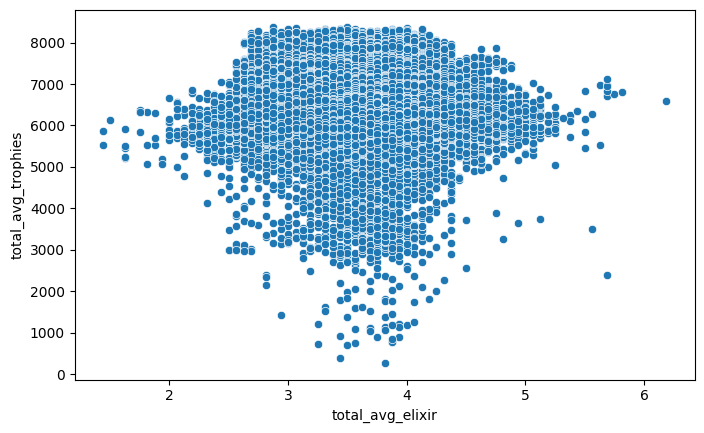

In [43]:
games_but_elixir['total_avg_elixir'] = games_but_elixir[['Average_deck_elixir_cost_player1', 'Average_deck_elixir_cost_player2']].mean(axis=1)
games_but_elixir['total_avg_trophies'] = games_but_elixir[['p1trophies', 'p2trophies']].mean(axis=1)
games_but_elixir.head()

plt.figure().set_figwidth(8)
sns.scatterplot(games_but_elixir,x='total_avg_elixir',y='total_avg_trophies')

Create violin plot with bins as trophy ranges above

NEED TO PLOT WINRATE VERSUS ELIXIR COST